# "DTW for Python" package examples

## Toni Giorgino

The following editable cells reproduce the examples provided in the package's [home page](https://dynamictimewarping.github.io/python/). 

Please refer to the following papers:
 * *General overview of the package, options, and algorithm*: T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package. J. Stat. Soft., 31(7). [doi:10.18637/jss.v031.i07](https://doi.org/10.18637/jss.v031.i07).
 * *Partial matching strategies and normalization*: P. Tormene, T. Giorgino, S. Quaglini, M. Stefanelli (2008). Matching Incomplete Time Series with Dynamic Time Warping: An Algorithm and an Application to Post-Stroke Rehabilitation. Artificial Intelligence in Medicine, 45(1), 11-34. [doi:10.1016/j.artmed.2008.11.007](https://dx.doi.org/10.1016/j.artmed.2008.11.007).



In [1]:
!pip install dtw-python

     |████████████████████████████████| 580 kB 7.8 MB/s 


[0.         0.06343434 0.12686869 0.19030303 0.25373737 0.31717172
 0.38060606 0.4440404  0.50747475 0.57090909 0.63434343 0.69777778
 0.76121212 0.82464646 0.88808081 0.95151515 1.01494949 1.07838384
 1.14181818 1.20525253 1.26868687 1.33212121 1.39555556 1.4589899
 1.52242424 1.58585859 1.64929293 1.71272727 1.77616162 1.83959596
 1.9030303  1.96646465 2.02989899 2.09333333 2.15676768 2.22020202
 2.28363636 2.34707071 2.41050505 2.47393939 2.53737374 2.60080808
 2.66424242 2.72767677 2.79111111 2.85454545 2.9179798  2.98141414
 3.04484848 3.10828283 3.17171717 3.23515152 3.29858586 3.3620202
 3.42545455 3.48888889 3.55232323 3.61575758 3.67919192 3.74262626
 3.80606061 3.86949495 3.93292929 3.99636364 4.05979798 4.12323232
 4.18666667 4.25010101 4.31353535 4.3769697  4.44040404 4.50383838
 4.56727273 4.63070707 4.69414141 4.75757576 4.8210101  4.88444444
 4.94787879 5.01131313 5.07474747 5.13818182 5.20161616 5.26505051
 5.32848485 5.39191919 5.45535354 5.51878788 5.58222222 5.645656

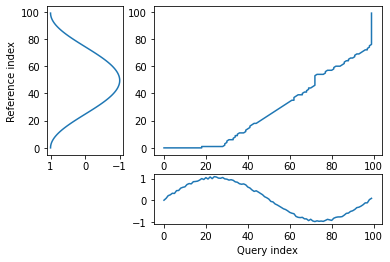

<AxesSubplot:>

In [2]:
import numpy as np

## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

In [ ]:
print(asymmetricP0)

Step pattern recursion:
 g[i,j] = min(
     g[i  ,j-1] + 0 * d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-1,j  ] +     d[i  ,j  ] ,
 ) 

Normalization hint: N



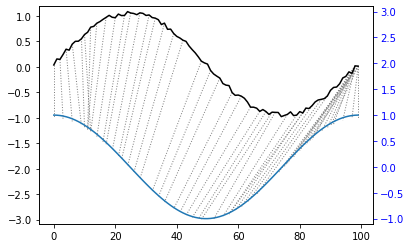

In [ ]:
## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



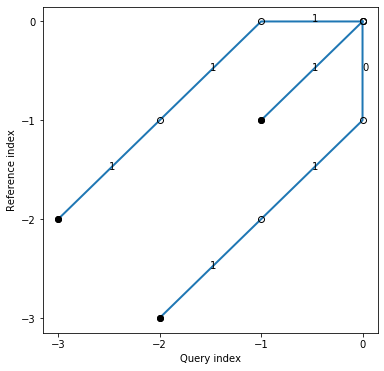

In [ ]:
## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

## And much more!

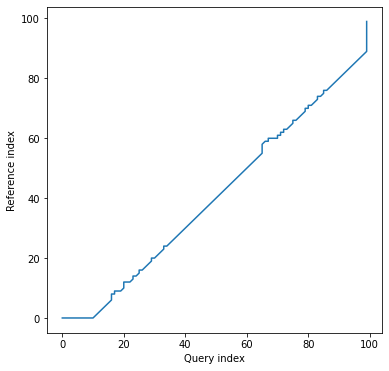

In [ ]:
# Use a windowing restrain
alignment = dtw(query, template, keep_internals=True, 
    window_type="sakoechiba", window_args={'window_size': 10})\
    .plot()

In [ ]:
# Stand-alone (shell) executable
!dtw 

usage: dtw [-h] [--step_pattern STEP_PATTERN] query reference

Command line DTW utility.

positional arguments:
  query                 Query timeseries (tsv)
  reference             Reference timeseries (tsv)

optional arguments:
  -h, --help            show this help message and exit
  --step_pattern STEP_PATTERN
                        Step pattern, aka recursion rule. E.g. symmetric2,
                        asymmetric, ...

The Python and R interfaces provide the full functionality, including plots.
See https://dynamictimewarping.github.io/


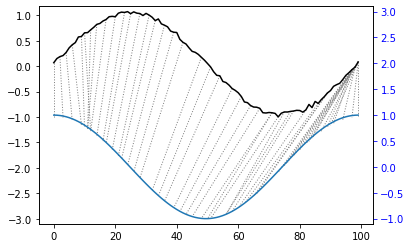

In [ ]:
# OO method call chain
a=dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)


In [ ]:
# Editing the plot and saving to file
a.set_xlabel("test X")
a.figure.savefig("test.png")

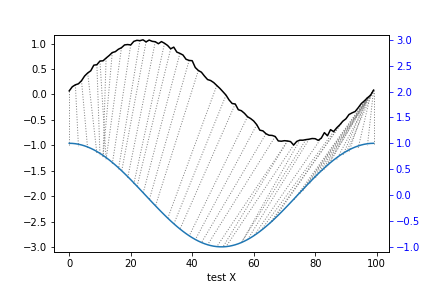

In [ ]:
from IPython.display import Image
Image('test.png')